I am trying to align both files sample-by-sample so that I can "subtract" the reference from the degraded.

I managed to align both using [dtw-python](https://dynamictimewarping.github.io/py-api/html/api/dtw.dtw.html). The good thing is that I can specify a window size which speeds up the runtime as I pre-align the audio, and can estimate the maximum distance between two samples. The undesirable side effect is that it modifies the reference to accommodate for artifacts that only exist at the degraded file. I am confident that it is possible to take advantage of this side effect and label which artifacts were added and removed on the degraded file, but I am not there yet.

Another issue I am trying to alleviate is the fact that some waves are out of phase on the degraded file. This confuses the DTW algorithm and results in poor matching. I am trying to use shapeDTW as a way around the phase issue, but had no success so far using the existing implementation.

In [1]:
import librosa

sample_rate = 8000
ref_path = 'data/ref_slice.wav'
deg_path = 'data/deg_slice.wav'
ref, sr = librosa.load(ref_path, sr=sample_rate)
deg, sr = librosa.load(deg_path, sr=sample_rate)

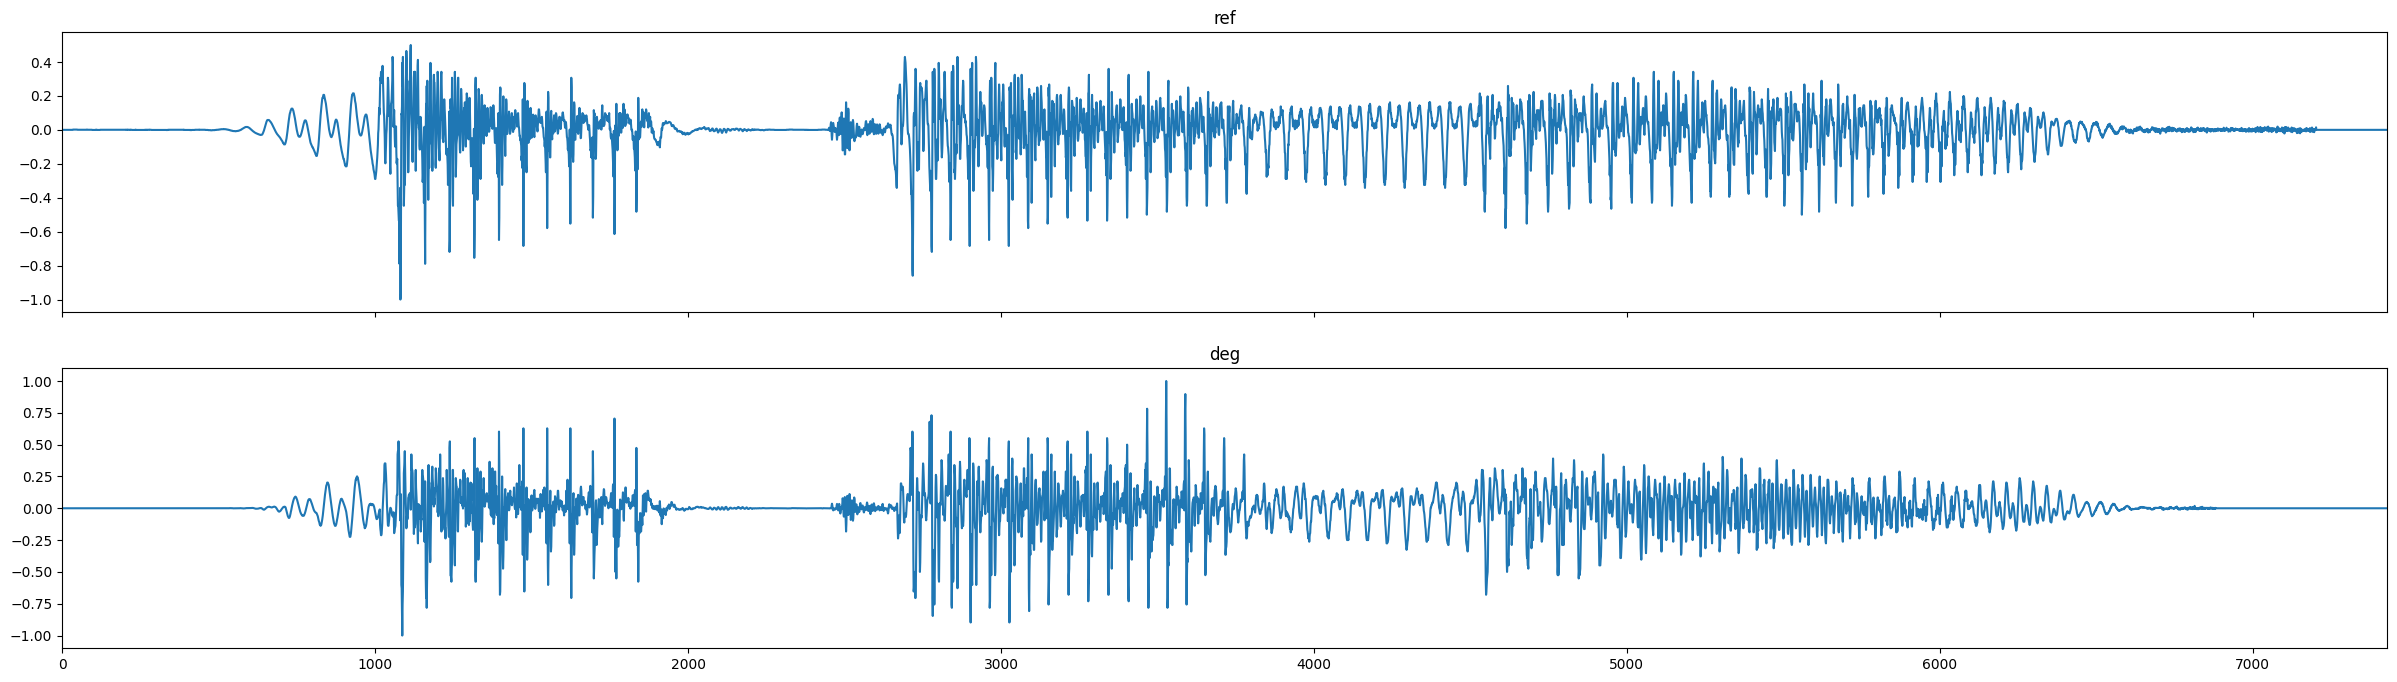

**ref**

**deg**

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, Markdown, display

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(30, 8))
ax1.plot(ref)
ax1.set_title('ref')
ax1.margins(x=0)
ax2.plot(deg)
ax2.set_title('deg')
ax2.margins(x=0)
plt.show()

display(Markdown('**ref**'))
display(Audio(ref, rate=sample_rate))
display(Markdown('**deg**'))
display(Audio(deg, rate=sample_rate))


In [3]:
import gdtw

phi, x_tau, f_tau, g = gdtw.warp(ref, deg,
    params={
        "lambda_inst": 0.1, # 0.1
        "lambda_cum":  1.0, # 1.0
        })

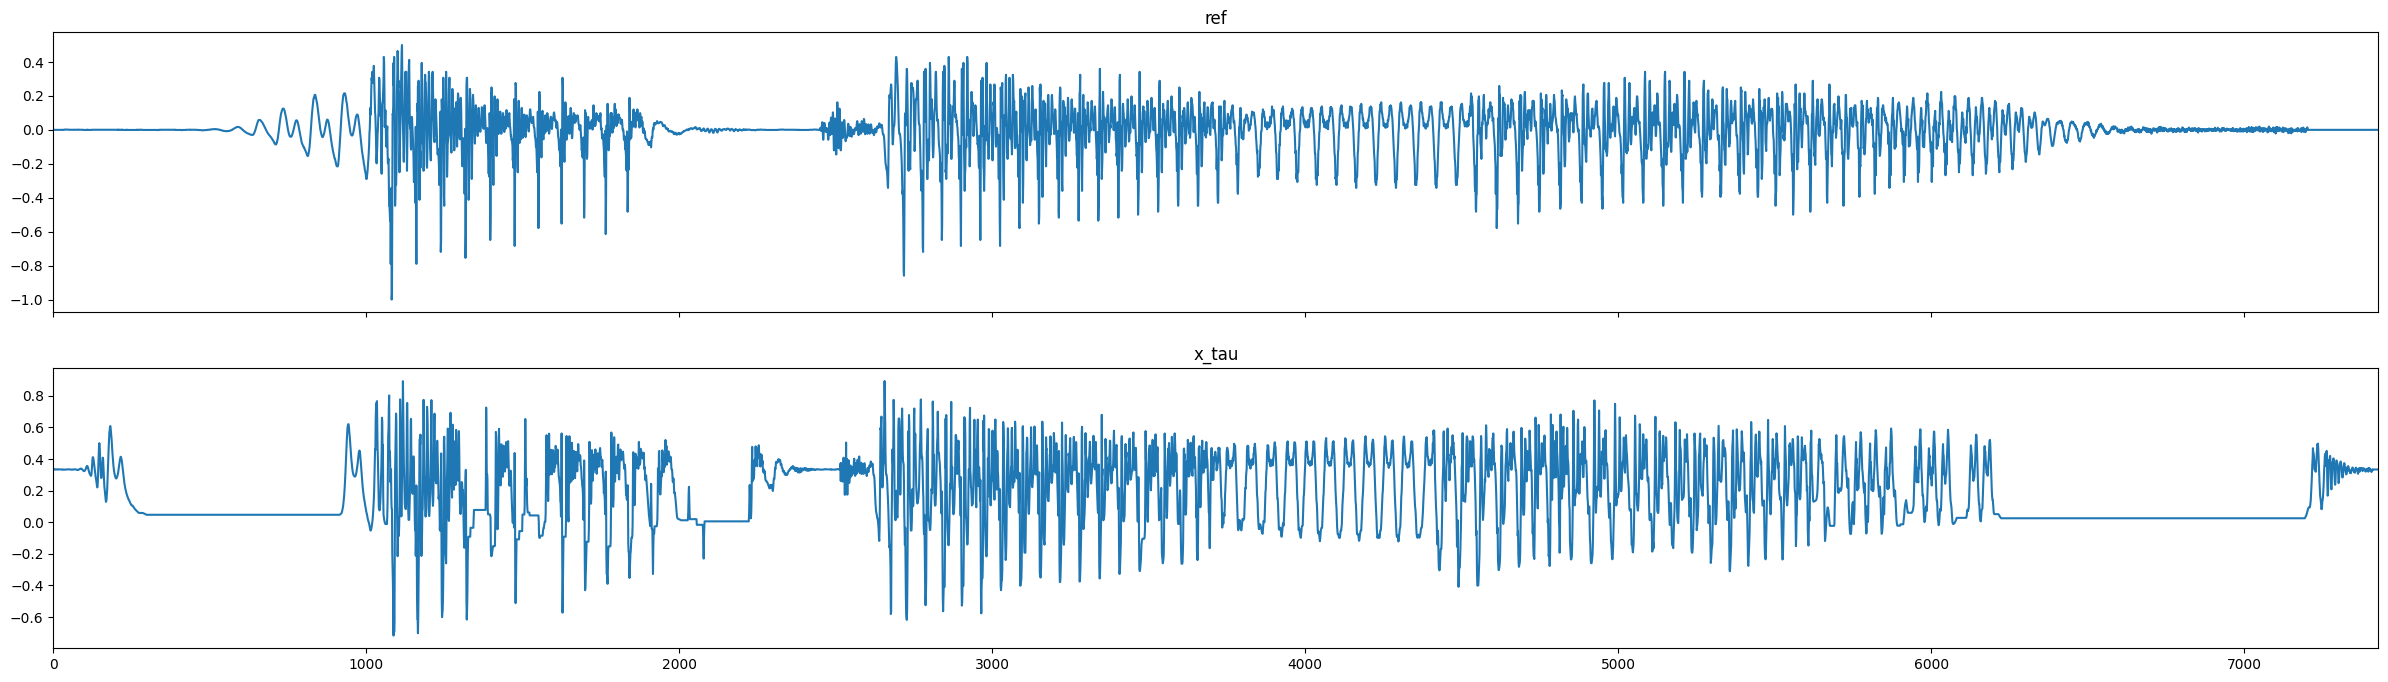

**ref**

**deg**

**x_tau**

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(30, 8))
ax1.plot(ref)
ax1.set_title('ref')
ax1.margins(x=0)
ax2.plot(x_tau)
ax2.set_title('x_tau')
ax2.margins(x=0)
plt.show()

display(Markdown('**ref**'))
display(Audio(ref, rate=sample_rate))
display(Markdown('**deg**'))
display(Audio(deg, rate=sample_rate))
display(Markdown('**x_tau**'))
display(Audio(x_tau, rate=sample_rate))